In [6]:
import numpy as np
import scipy.linalg as lin
import copy
import matplotlib.pyplot as plt
from scipy.sparse import diags

In [7]:
alpha=0.2

def calc_error(x, alpha=alpha):
    n=len(x)
    r=np.ones(n)
    for i in range(n):
        if i==0:
            r[0]=2*x[0]+(-1-alpha)*x[1]-(1-alpha)
        else:
            if i==n-1:
                r[n-1]=(-1+alpha)*x[n-2]+2*x[n-1]-(1+alpha)
            else:
                r[i]=(-1+alpha)*x[i-1]+2*x[i]+(-1-alpha)*x[i+1]
    return r

def Jacobi_sparse(n, alpha=alpha, error=1e-9):
    x=2*np.ones(n)
    r=calc_error(x)
    norm=lin.norm(r, 2)
    y=copy.deepcopy(x)
    k=0
    K=1000
    while k<K:
        k+=1
        for i in range(n):
            if i==0:
                x[i]=(1-alpha+(1+alpha)*y[i+1])/2
            elif i==n-1:
                x[i]=(1+alpha+(1-alpha)*y[i-1])/2
            else:
                    x[i]=((1+alpha)*y[i+1]+(1-alpha)*y[i-1])/2
        y=copy.deepcopy(x)
        if np.all(r) or np.any(r==0):
            r=calc_error(x)
            norm=lin.norm(r, 2)
        else:
            return []
        if norm<=error:
            return k, x
    return []    

In [49]:
def do_research(Method, n):
    conv=[]
    A=np.arange(-2, 2, 0.01)
    for Alpha in A:
        x=Method(n, Alpha)
        if x!=[]:            
            conv.append((x[0], Alpha))
    return conv

In [13]:
#следующий график показывает, как связаны между собой коэффициент и размерность, при условии, что метод сошёлся
# plt.figure(figsize=(16, 10))
# plt.xlabel(r'$\alpha$')
# plt.ylabel(r'$N$, размерность')
# plt.scatter(Par, Dim)
# plt.savefig("hist")
# plt.show()


In [41]:
#Эта функция позволяет строить сечения графика функции T=T(N, A) по оси N
def build_plot_for_N(N):
    Res=do_research(N)
    Term, Par=zip(*Res)
    plt.figure(figsize=(8, 8))
    plt.scatter(Par, Term)
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'Term, $k(N)$')
    plt.show()

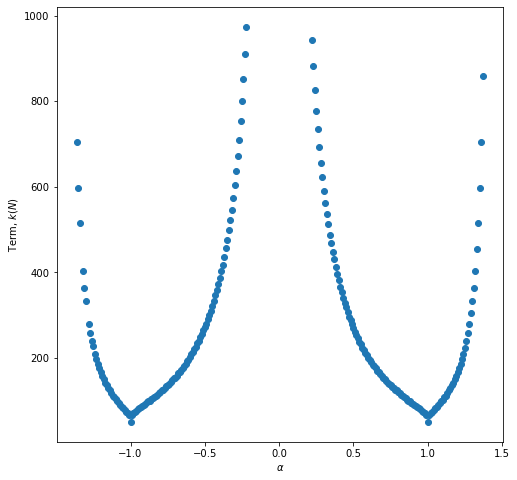

In [42]:
#Построим сечение, например, для N=50
build_plot_for_N(50)


In [150]:
import numpy as np
import scipy.linalg as lin
import copy
import matplotlib.pyplot as plt
from scipy.sparse import diags

def Seidel_m(A, b, t=1, error=1e-9):
    U=np.triu(A, 1)
    L=np.tril(A, -1)
    D=np.diag(np.diag(A))
    R=-lin.inv((L+D))@U
    if np.max(np.abs(lin.eig(R)[0]))>=1:
        print("Метод Гаусса-Зейделя расходится")
        return []
    n=np.shape(A)[0]
    x=np.ones((n, 1))*2
    y=copy.deepcopy(x)
    r=A@x-b
    k=0
    K=10000
    while k<K:
        for i in range(n):
            x[i]=1/D[i][i]*(-U[i,:]@y-L[i, :]@x+b[i])
        r=A@x-b
        if r.T@r<error**2:
            return k, x
        y=copy.deepcopy(x)
        k+=1

In [174]:
def solve_sys_with_meth(Meth, N, alpha=0.5, t=1):
    x=np.ones(N-1)*(-1+alpha)
    y=np.ones(N-1)*(-1-alpha)
    z=np.ones(N)*2
    A=diags([x, z, y], [-1, 0, 1]).toarray()
    b=np.zeros((N, 1))
    b[0]=1-alpha
    b[N-1]=1+alpha
    return Meth(A, b, t)

In [176]:
alpha=0.5
print(solve_sys_with_meth(Seidel_m, 100, alpha)[0], Jacobi_sparse(100, alpha)[0], sep='\n')

253
410


In [186]:
def Gen_solve(A, b, t=1, error=1e-9):
    L, D, U=np.tril(A, -1), np.diag(np.diag(A)), np.triu(A, 1)
    n=np.shape(A)[0]
    x=np.ones((n, 1))*5
    y=copy.deepcopy(x)
    r=A@x-b
    K=10000
    k=0
    while k<K:
        k+=1
        for i in range(n):
            x[i]=(b[i]*t-(((t-1))*(L+D)[i,:]+U[i,:]*t)@y-L[i,: ]@x)/D[i][i]
        r=A@x-b
        if r.T@r<error**2:
            return k, x
        y=copy.deepcopy(x)
    return []

In [ ]:
def research_for_sys(Meth, N, alpha):
    Term=[]
    T=np.arange(-2, 2, 0.01)
    for t in T:
        x=solve_sys_with_meth(Meth, N, alpha, t)
        if x!=[]:
            Term.append((x[0], t))
    return Term


<ipython-input-186-9a35794a96a4>:14: RuntimeWarning: overflow encountered in matmul
  if r.T@r<error**2:
<ipython-input-186-9a35794a96a4>:12: RuntimeWarning: overflow encountered in matmul
  x[i]=(b[i]*t-(((t-1))*(L+D)[i,:]+U[i,:]*t)@y-L[i,: ]@x)/D[i][i]
<ipython-input-186-9a35794a96a4>:12: RuntimeWarning: invalid value encountered in matmul
  x[i]=(b[i]*t-(((t-1))*(L+D)[i,:]+U[i,:]*t)@y-L[i,: ]@x)/D[i][i]
<ipython-input-186-9a35794a96a4>:13: RuntimeWarning: invalid value encountered in matmul
  r=A@x-b
<ipython-input-186-9a35794a96a4>:13: RuntimeWarning: overflow encountered in matmul
  r=A@x-b


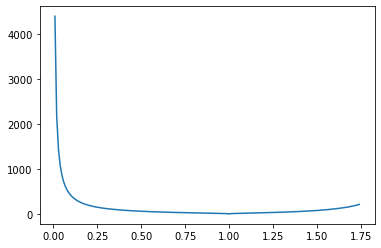

In [190]:
x, y=zip(*research_for_sys(Gen_solve, 10, 1))
plt.plot(y, x)
plt.show()

In [191]:
def SOR(A, b, t=1, error=1e-9):
    L, D, U=np.tril(A, -1), np.diag(np.diag(A)), np.triu(A, 1)
    n=np.shape(A)[0]
    x=np.ones((n, 1))*5
    y=copy.deepcopy(x)
    r=A@x-b
    K=10000
    k=0
    while k<K:
        k+=1
        for i in range(n):
            x[i]=(1-t)*y[i]+(t*(b[i]-U[i,:]@y-L[i,:]@x))/D[i][i]
        r=A@x-b
        if r.T@r<error**2:
            return x
        y=copy.deepcopy(x)
    return []

In [192]:
z, t=zip(*research_for_sys(SOR, 10, 1))
plt.plot(z, t)
plt.show()

<ipython-input-191-dedbad2e2562>:14: RuntimeWarning: overflow encountered in matmul
  if r.T@r<error**2:
<ipython-input-191-dedbad2e2562>:13: RuntimeWarning: overflow encountered in matmul
  r=A@x-b
<ipython-input-191-dedbad2e2562>:12: RuntimeWarning: overflow encountered in multiply
  x[i]=(1-t)*y[i]+(t*(b[i]-U[i,:]@y-L[i,:]@x))/D[i][i]
<ipython-input-191-dedbad2e2562>:12: RuntimeWarning: invalid value encountered in matmul
  x[i]=(1-t)*y[i]+(t*(b[i]-U[i,:]@y-L[i,:]@x))/D[i][i]
<ipython-input-191-dedbad2e2562>:13: RuntimeWarning: invalid value encountered in matmul
  r=A@x-b


KeyboardInterrupt: 

In [104]:
import copy
alpha=0.5

def ChAc(N, alpha=alpha, error=1e-9):
    b=np.zeros((N, 1))
    b[0]=1-alpha
    b[N-1]=1+alpha
    z_1=np.ones(N-1)*(-1-alpha)
    z_2=2*np.ones(N)
    z_3=np.ones(N-1)*(-1+alpha)
    A=diags([z_1, z_2, z_3], [-1, 0, 1]).toarray()
    E=np.eye(N)
    t=0
    for t_ in np.arange(-4, 4,  0.1):
        if not isinstance(lin.eig(E-t_*A)[0], complex):
            t=t_
            break
    R, f=E-t*A, t*b
    rho=max(np.abs(lin.eig(R)[0]))+1
    mu_0, mu_1=1, rho
    x_0=np.ones((N, 1))
    y_0, y_1=x_0, R@x_0+f
    k=0
    K=1000
    while k<K:
        k+=1
        mu_2=1/(2/(mu_1*rho)-1/mu_0)
        y_2=mu_2*(2*R@y_1/(rho*mu_1)-y_0/mu_0+2*f/(rho*mu_1))
        print(y_2)
        r=y_2-y_1
        if r.T@r<error**2:
            return y_2
        y_0=copy.deepcopy(y_1)
        y_1=copy.deepcopy(y_2)
        mu_0=copy.deepcopy(mu_1)
        mu_1=copy.deepcopy(mu_2)
    print("Failure")
    return []

ChAc(4)

[[0.54827004]
 [1.67759494]
 [1.31621097]
 [0.36757806]]
[[-2.66491341]
 [-1.01746418]
 [ 1.29668591]
 [-4.13087877]]
[[-0.1229984 ]
 [ 2.48439769]
 [ 3.19399285]
 [-1.13517549]]
[[-1.38708711]
 [-2.32885863]
 [-0.3597118 ]
 [-0.09275305]]
[[-0.10906833]
 [ 2.49026813]
 [ 6.06571626]
 [ 0.63445642]]
[[-0.9092205 ]
 [-2.19954542]
 [-2.4692854 ]
 [ 2.15866066]]
[[ 0.79487542]
 [ 3.21231296]
 [ 8.12048376]
 [14.24406301]]
[[-0.93955406]
 [-1.84584987]
 [-2.23998049]
 [-0.90007379]]
[[ 6.25327464]
 [11.40084446]
 [31.60146913]
 [86.93167374]]
[[-1.17568189]
 [-1.34089981]
 [-1.43872389]
 [-5.69841049]]
[[ -2.72770904]
 [ -6.87147168]
 [-23.17797464]
 [-31.71576919]]
[[-1.20590514]
 [-0.75758008]
 [-2.59487562]
 [-7.26817484]]
[[ -0.63865422]
 [ -5.16450892]
 [-10.70500407]
 [ -8.57931798]]
[[-0.50110864]
 [-1.3904609 ]
 [-4.44934415]
 [-6.37748901]]
[[-1.0524874 ]
 [-4.04307448]
 [-6.2287866 ]
 [-5.80698989]]
[[ 0.34009782]
 [-2.84865647]
 [-6.28362318]
 [-6.06425479]]
[[-2.00039301]
 [-2.

 [-2.83483487]]
[[-3.72707928]
 [-3.7687354 ]
 [-5.57932119]
 [-9.96491268]]
[[-0.92475417]
 [-2.934462  ]
 [-3.22585975]
 [-1.41611166]]
[[ -6.16528397]
 [-13.99535201]
 [-13.41796912]
 [ -7.68628213]]
[[-0.74449387]
 [-2.24996061]
 [-3.55175521]
 [-2.56226897]]
[[  4.44049997]
 [ 24.24758727]
 [ 24.31647931]
 [-10.96396999]]
[[-1.08294264]
 [-1.10011512]
 [-3.28511102]
 [-6.14616716]]
[[ 1.38557275]
 [ 4.6862707 ]
 [ 7.29882332]
 [-1.32101234]]
[[-1.02937984]
 [-0.89234172]
 [-2.47323928]
 [-9.74079713]]
[[0.92780189]
 [1.7734415 ]
 [2.56752923]
 [5.26739701]]
[[-0.45547233]
 [-1.15978257]
 [-4.02591771]
 [-8.47775997]]
[[0.30256008]
 [0.92641196]
 [2.0053095 ]
 [5.74718595]]
[[ 0.46473266]
 [-1.93991223]
 [-7.96801631]
 [-3.20193453]]
[[-0.40405709]
 [ 0.71574404]
 [ 3.6195883 ]
 [ 2.48211139]]
[[  1.65701578]
 [ -6.82637614]
 [-11.82947359]
 [ -4.5664532 ]]
[[-0.9057936 ]
 [ 1.19918401]
 [ 3.87519798]
 [ 1.34810579]]
[[ 2.11507826]
 [ 0.91534378]
 [-2.74136403]
 [ 6.28330602]]
[[-0

[]